In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10, 10)})

In [2]:
df_main = pd.read_csv('../full_adult_clean.csv')
labels = pd.read_csv('../adult_labels.csv')
df_main.head()
# read clean data + labels previously saved in KNN lab#

age  educational-num  gender  capital-gain  capital-loss  hours-per-week  \
0   25                7       1             0             0              40   
1   38                9       1             0             0              50   
2   28               12       1             0             0              40   
3   44               10       1          7688             0              40   
4   34                6       1             0             0              30   

   workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0                      0                    0                  1   
1                      0                    0                  1   
2                      0                    1                  0   
3                      0                    0                  1   
4                      0                    0                  1   

   workclass_Self-emp-inc  ...  occupation_Priv-house-serv  \
0                       0  ...                           0   
1                       0  ...                           0   
2                       0  ...                           0   
3                       0  ...                           0   
4                       0  ...                           0   

   occupation_Prof-specialty  occupation_Protective-serv  occupation_Sales  \
0                          0                           0                 0   
1                          0                           0                 0   
2                          0                           1                 0   
3                          0                           0                 0   
4                          0                           0                 0   

   occupation_Tech-support  occupation_Transport-moving  is_married  \
0                        0                            0           0   
1                        0                            0           1   
2                        0                            0           1   
3                        0                            0           1   
4                        0                            0           0   

   has_children  is_white  from_US  
0             1         0        1  
1             0         1        1  
2             0         1        1  
3             0         0        1  
4             0         1        1  

[5 rows x 29 columns]

1. Decision tree

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data = scaler.fit_transform(df_main)
data = df_main
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, 
                                             test_size=0.3, random_state=2021) 

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

tree = DecisionTreeClassifier(max_depth=3, random_state=2021)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_valid)
f1_score(y_valid, y_pred)
# for max depth == 5 -> accuracy higher ~ 0.85

0.6286499484713157

In [30]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', feature_names=df_main.columns)
# print(open('tree.dot').read())

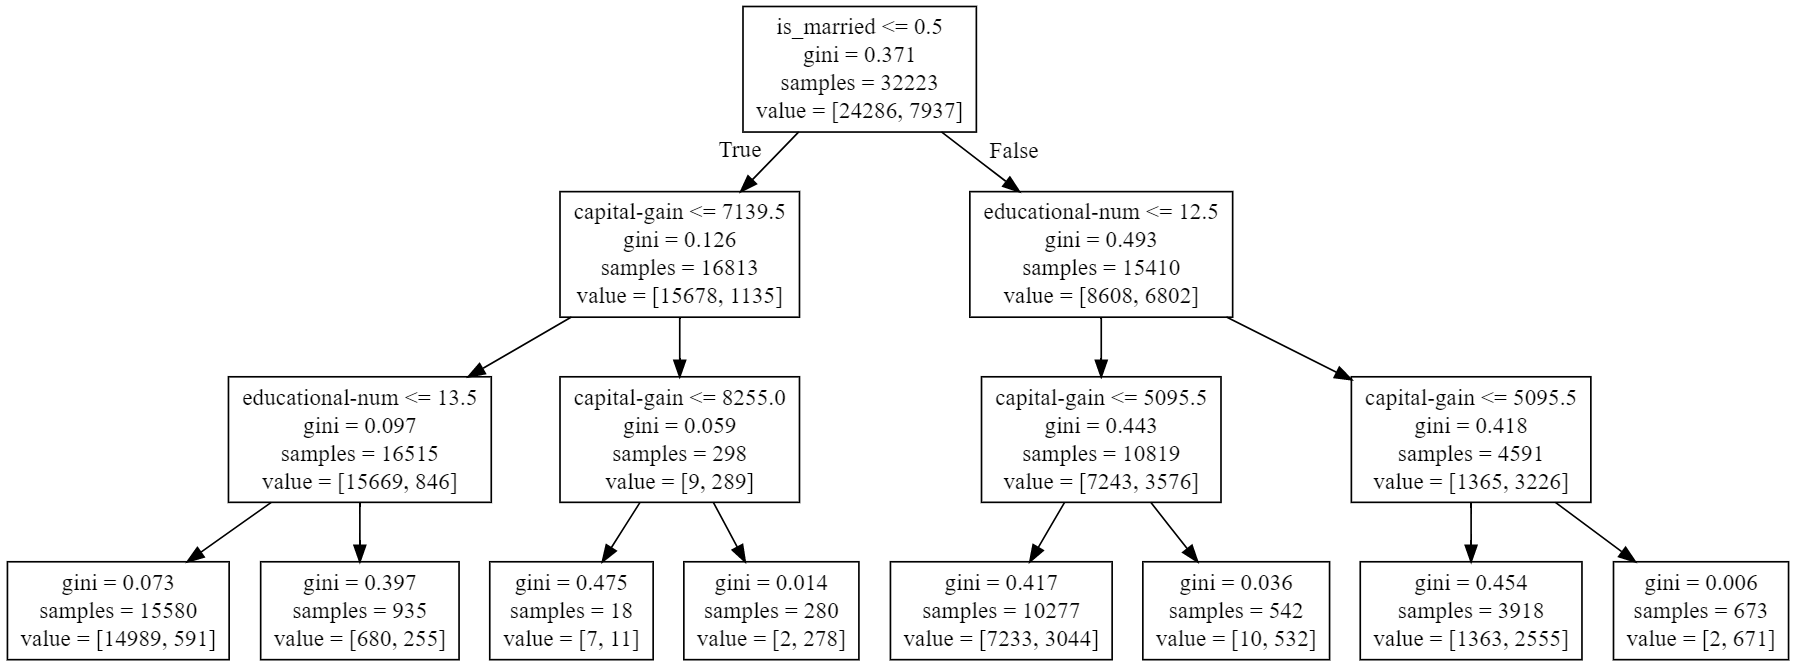

In [31]:
from IPython import display
display.Image("../graphviz.png")

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# cross validation shows overall worser result
kf = KFold(n_splits=5, shuffle=True, random_state=2021)
dtc = DecisionTreeClassifier(max_depth=3, random_state=2021)
scores = cross_val_score(dtc, data, labels, cv=kf, scoring='accuracy')

print('Metrics values for each fold:', scores)
print('Average on cross validation:', np.mean(scores))

Metrics values for each fold: [0.84479201 0.83632019 0.82817422 0.8441234  0.83890941]
Average on cross validation: 0.8384638434409621


Grid search cross-validation by 4 params (max_depth, min_samples_leaf,
min_samples_split, max_features) separetly

Best estimator by max depth: DecisionTreeClassifier(max_depth=10, random_state=2021)
Best score by max depth: 0.8499208843005732


Text(0, 0.5, 'Mean accuracy on test set')

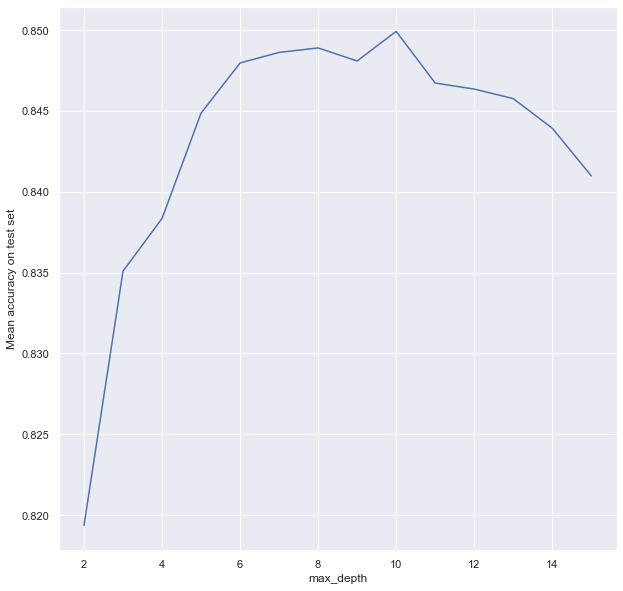

In [33]:
from sklearn.model_selection import GridSearchCV

tree_params = {'max_depth': np.arange(2, 16)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X_train, y_train)
print('Best estimator by max depth:', tree_grid.best_estimator_)
print('Best score by max depth:', tree_grid.best_score_)

results_df = pd.DataFrame(tree_grid.cv_results_)
plt.plot(results_df['param_max_depth'], results_df['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Mean accuracy on test set')
# Definite max equals to 10#
# Below for other params, max width best value will also be set before

Best estimator by samples leaf: DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=2021)
Best score by samples leaf: 0.8515035353819911


Text(0, 0.5, 'Mean accuracy on test set')

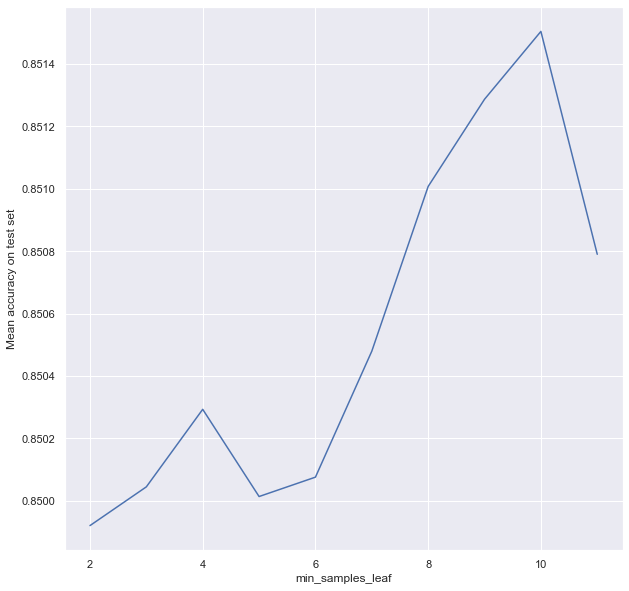

In [34]:
tree_params = {'min_samples_leaf': np.arange(2, 12), 'max_depth': [10]}

tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X_train, y_train)
print('Best estimator by samples leaf:', tree_grid.best_estimator_)
print('Best score by samples leaf:', tree_grid.best_score_)

results_df = pd.DataFrame(tree_grid.cv_results_)
plt.plot(results_df['param_min_samples_leaf'], results_df['mean_test_score']) 
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean accuracy on test set')
# Definite max equals to 10 min samples leafs

Best estimator by samples split: DecisionTreeClassifier(max_depth=10, min_samples_split=9, random_state=2021)
Best score by samples split: 0.8501070366212892


Text(0, 0.5, 'Mean accuracy on test set')

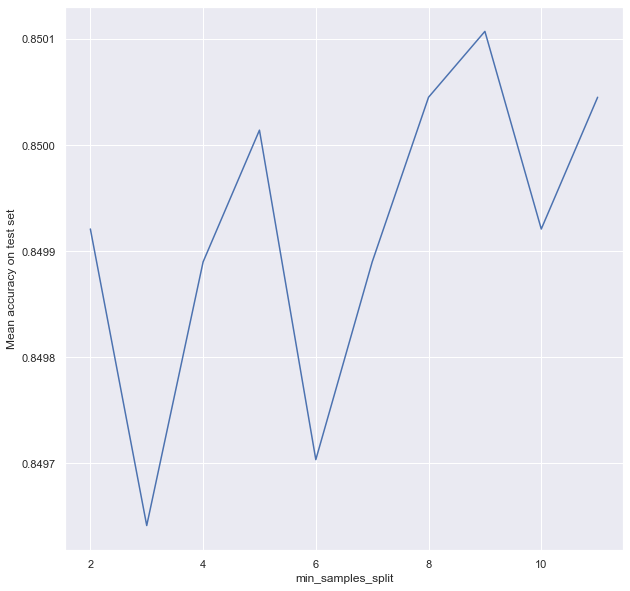

In [35]:
tree_params = {'min_samples_split': np.arange(2, 12), 'max_depth': [10]}

tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X_train, y_train)
print('Best estimator by samples split:', tree_grid.best_estimator_)
print('Best score by samples split:', tree_grid.best_score_)

results_df = pd.DataFrame(tree_grid.cv_results_)
plt.plot(results_df['param_min_samples_split'], results_df['mean_test_score']) 
plt.xlabel('min_samples_split')
plt.ylabel('Mean accuracy on test set')
# Can also be checked shifted range beginning with 9 (for now this is max)

Best estimator by max features: DecisionTreeClassifier(max_depth=10, max_features=0.9, random_state=2021)
Best score by max features: 0.8501691628394585


Text(0, 0.5, 'Mean accuracy on test set')

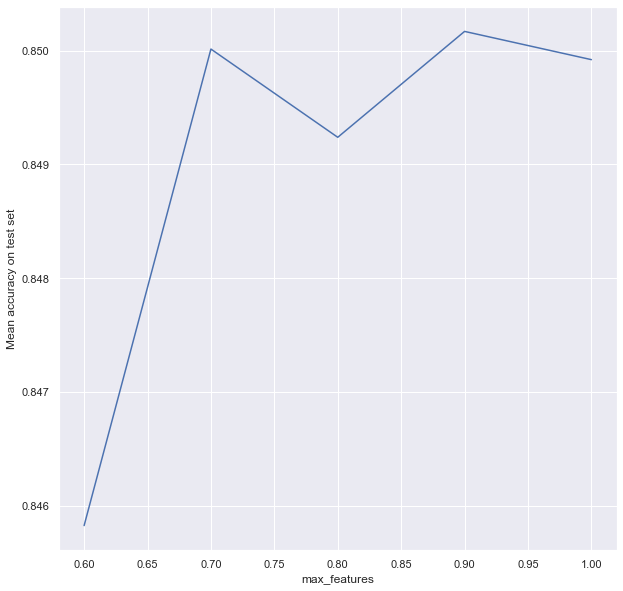

In [36]:
tree_params = {'max_features': np.array([0.6, 0.7, 0.8, 0.9, 1.0]), 'max_depth': [10]}

tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X_train, y_train)
print('Best estimator by max features:', tree_grid.best_estimator_)
print('Best score by max features:', tree_grid.best_score_)

results_df = pd.DataFrame(tree_grid.cv_results_)
plt.plot(results_df['param_max_features'], results_df['mean_test_score']) 
plt.xlabel('max_features')
plt.ylabel('Mean accuracy on test set')
# Definite max equals to 0.9 of all features#

Grid search over all 4 params simultaneously;
Plots added for each hyper-param correlation, 
but in this case it is not informative
because of amount of possible points combinations (2187)

In [37]:
tree_params = {'max_depth': np.arange(2, 11), 'min_samples_leaf': np.arange(2, 11),
                'min_samples_split': np.arange(2, 11), 'max_features': np.array([0.7, 0.8, 0.9])}

tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='accuracy') 
tree_grid.fit(X_train, y_train)

pd.DataFrame(tree_grid.cv_results_).T

0     \
mean_fit_time                                                     0.022697   
std_fit_time                                                      0.002129   
mean_score_time                                                   0.003105   
std_score_time                                                    0.000585   
param_max_depth                                                          2   
param_max_features                                                     0.7   
param_min_samples_leaf                                                   2   
param_min_samples_split                                                  2   
params                   {'max_depth': 2, 'max_features': 0.7, 'min_sam...   
split0_test_score                                                 0.806672   
split1_test_score                                                 0.808379   
split2_test_score                                                  0.81443   
split3_test_score                                                 0.815022   
split4_test_score                                                 0.812694   
mean_test_score                                                   0.811439   
std_test_score                                                     0.00333   
rank_test_score                                                       1945   

                                                                      1     \
mean_fit_time                                                     0.022122   
std_fit_time                                                      0.000831   
mean_score_time                                                   0.002566   
std_score_time                                                    0.000491   
param_max_depth                                                          2   
param_max_features                                                     0.7   
param_min_samples_leaf                                                   2   
param_min_samples_split                                                  3   
params                   {'max_depth': 2, 'max_features': 0.7, 'min_sam...   
split0_test_score                                                 0.806672   
split1_test_score                                                 0.808379   
split2_test_score                                                  0.81443   
split3_test_score                                                 0.815022   
split4_test_score                                                 0.812694   
mean_test_score                                                   0.811439   
std_test_score                                                     0.00333   
rank_test_score                                                       1945   

                                                                      2     \
mean_fit_time                                                     0.021144   
std_fit_time                                                      0.001311   
mean_score_time                                                   0.002249   
std_score_time                                                    0.000389   
param_max_depth                                                          2   
param_max_features                                                     0.7   
param_min_samples_leaf                                                   2   
param_min_samples_split                                                  4   
params                   {'max_depth': 2, 'max_features': 0.7, 'min_sam...   
split0_test_score                                                 0.806672   
split1_test_score                                                 0.808379   
split2_test_score                                                  0.81443   
split3_test_score                                                 0.815022   
split4_test_score                                                 0.812694   
mean_test_score                                                   0.811439   
std_test_sco

In [38]:
print('Best estimator by max depth:', tree_grid.best_estimator_)
print('Best score by max depth:', tree_grid.best_score_)
# Overall in combinations, there are some other extr values for several params: 
# max_features and min_samples_leaf got 0.7 and 3 respectively
# in this composition estimator shows the best accuracy ~ 85.35%

Best estimator by max depth: DecisionTreeClassifier(max_depth=10, max_features=0.7, min_samples_leaf=3,
                       min_samples_split=10, random_state=2021)
Best score by max depth: 0.8535829698749723


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


Text(0, 0.5, 'Mean accuracy on test set')

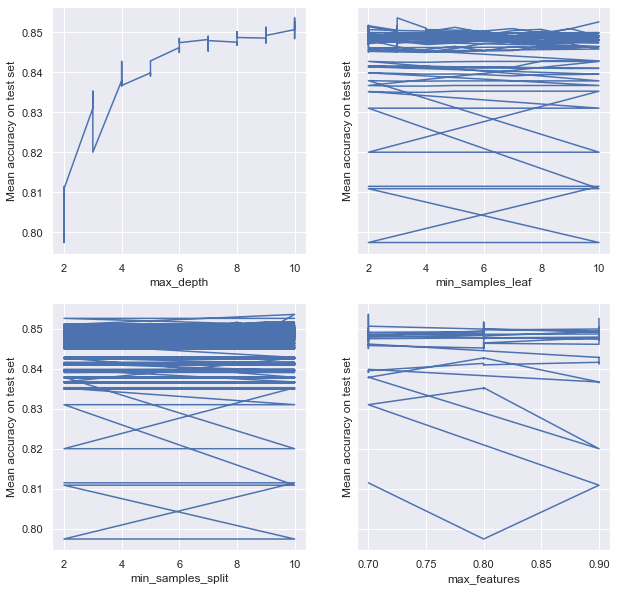

In [39]:
results_df = pd.DataFrame(tree_grid.cv_results_)
fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True)
print(results_df.columns)

ax[0][0].plot(results_df['param_max_depth'], results_df['mean_test_score'])
ax[0][0].set_xlabel('max_depth')
ax[0][0].set_ylabel('Mean accuracy on test set')

ax[0][1].plot(results_df['param_min_samples_leaf'], results_df['mean_test_score'])
ax[0][1].set_xlabel('min_samples_leaf')
ax[0][1].set_ylabel('Mean accuracy on test set')

ax[1][0].plot(results_df['param_min_samples_split'], results_df['mean_test_score'])
ax[1][0].set_xlabel('min_samples_split')
ax[1][0].set_ylabel('Mean accuracy on test set')

ax[1][1].plot(results_df['param_max_features'], results_df['mean_test_score'])
ax[1][1].set_xlabel('max_features')
ax[1][1].set_ylabel('Mean accuracy on test set')

# Plots are not informative in this case, as the values for 2d run repeatedly,
# as actually the accuracy is changing in 4 dimensions#

In [40]:
from IPython import display
best_tree = tree_grid.best_estimator_
export_graphviz(best_tree, out_file='tree.dot', feature_names=df_main.columns)
# print(open('tree.dot').read())
display.Image("../graphviz_best_tree.png")


Feature ranking:
1 is_married 0.3567069455282732
2 educational-num 0.2574032992076276
3 capital-gain 0.18950785928610694
4 capital-loss 0.0649876571955778
5 age 0.05341379489081121
6 hours-per-week 0.03460585020301037
7 occupation_Exec-managerial 0.012323063828450479
8 occupation_Prof-specialty 0.007029621659436895
9 gender 0.00616268202782787
10 workclass_Self-emp-not-inc 0.005306652869539334


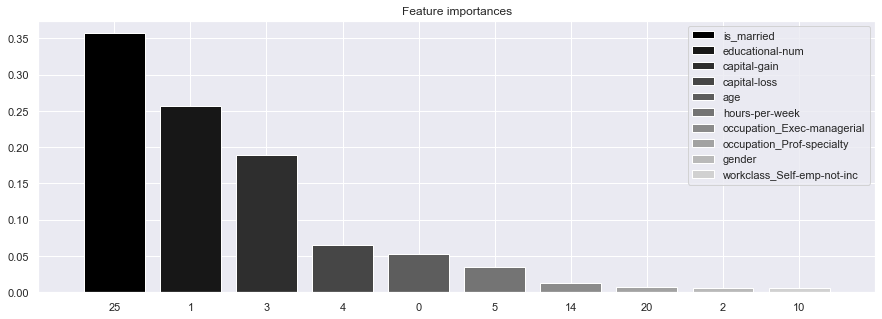

In [41]:
features = dict(zip(range(len(df_main.columns)-1), df_main.columns[:-1]))

importances = best_tree.feature_importances_

indices = np.argsort(importances)[::-1]
num_to_plot = 10
feature_indices = [ind for ind in indices[:num_to_plot]]

print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], 
    importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices])

# Features ranking reflects directly what graph-tree indicated
# Surprisingly, education level was put to 2nd place, meanwhile age 
# and hours-per-week ranked much lower, 
# however from EDA plots was suposed to be on contrary;
 

2. Random forest

In [42]:
# scaler = StandardScaler()
# data = scaler.fit_transform(df_main)
data = df_main
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, 
                                             test_size=0.3, random_state=2022) 

In [43]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_pred = forest.predict(X_valid)
accuracy_score(y_valid, y_pred)

# Default random forest returns almost the same result as initial decision tree

0.8389572773352643

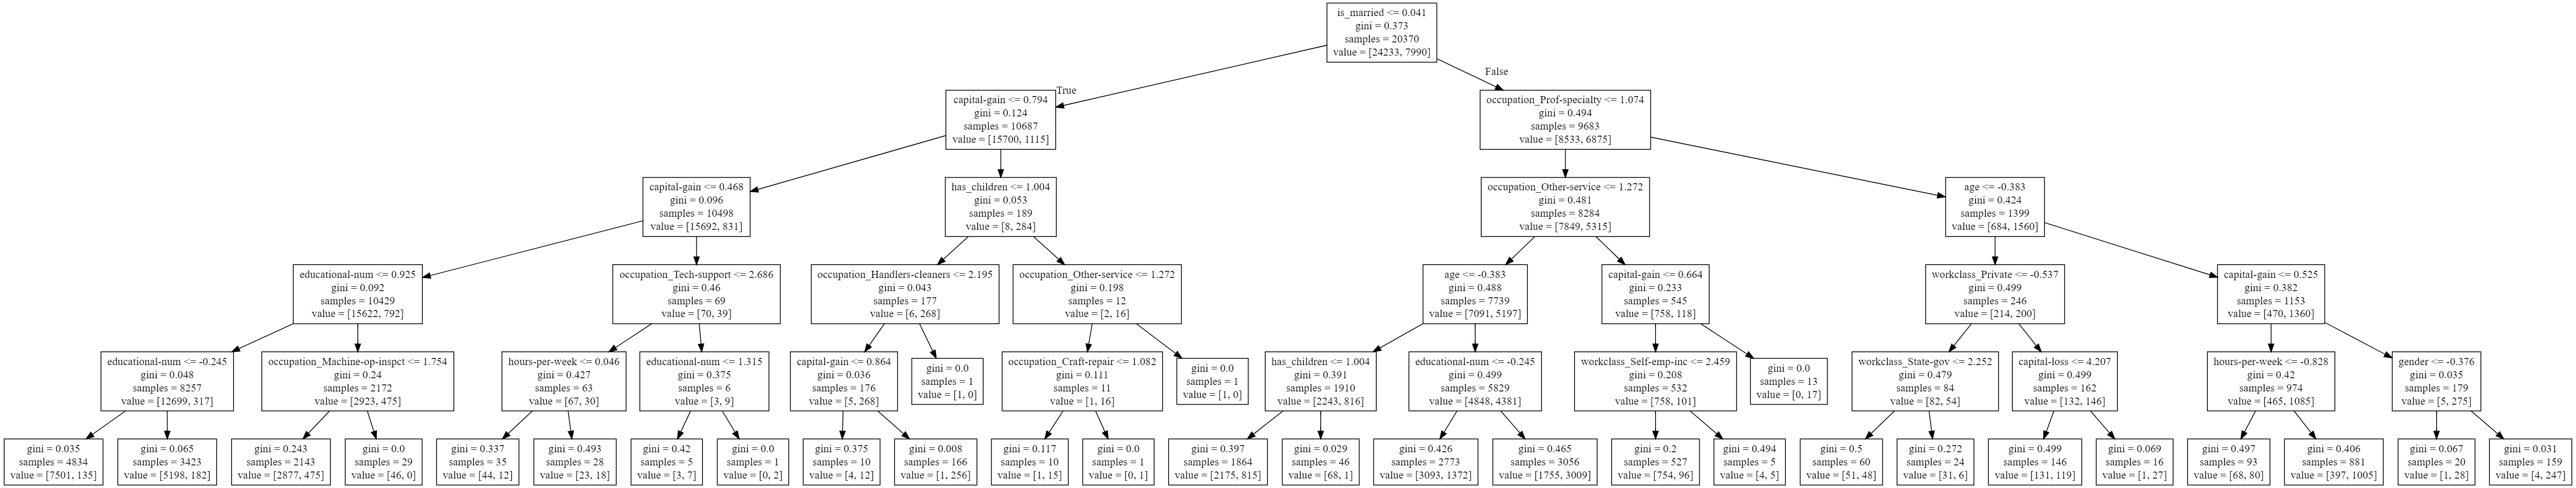

In [44]:
estimator = forest.estimators_[5]
export_graphviz(estimator, out_file='forest.dot', feature_names=df_main.columns)
# print(open('forest.dot').read())
display.Image("../rnd_forest_one_of_estimators.png")

Best estimator by estimators number: RandomForestClassifier(n_estimators=110)
Best score by estimators number: 0.8426900782488893


Text(0, 0.5, 'Mean accuracy on test set')

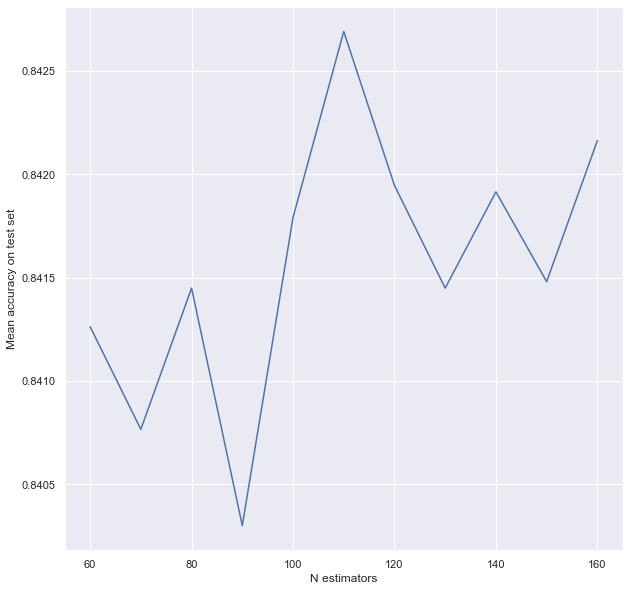

In [45]:
forest_params = {'n_estimators': np.arange(60, 170, 10)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, scoring='accuracy')
forest_grid.fit(X_train, y_train)
print('Best estimator by estimators number:', forest_grid.best_estimator_)
print('Best score by estimators number:', forest_grid.best_score_)

results_df = pd.DataFrame(forest_grid.cv_results_)
plt.plot(results_df['param_n_estimators'], results_df['mean_test_score'])
plt.xlabel('N estimators')
plt.ylabel('Mean accuracy on test set')
# Best estimators number by grid search did not reveal high increment in accuracy

Best estimator by max depth: RandomForestClassifier(max_depth=18, n_estimators=140)
Best score by max depth: 0.8588895823371034


Text(0, 0.5, 'Mean accuracy on test set')

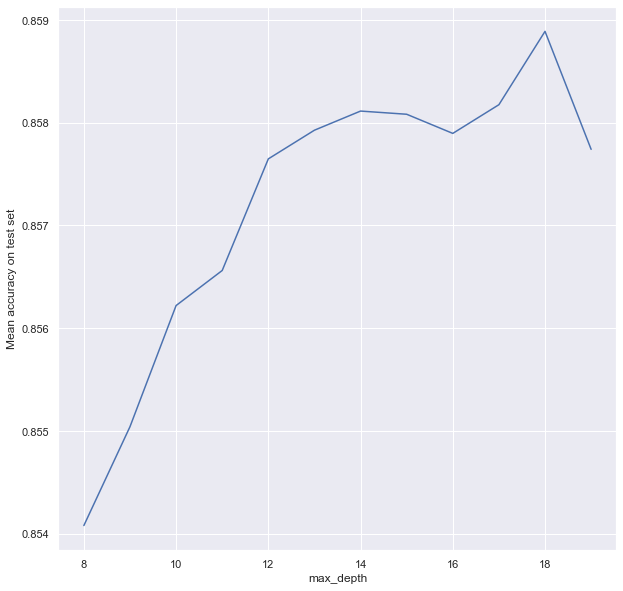

In [46]:
forest_params = {'max_depth': np.arange(8, 20), 'n_estimators': [140]}

forest_grid = GridSearchCV(forest, forest_params, cv=5, scoring='accuracy')
forest_grid.fit(X_train, y_train)
print('Best estimator by max depth:', forest_grid.best_estimator_)
print('Best score by max depth:', forest_grid.best_score_)

results_df = pd.DataFrame(forest_grid.cv_results_)
plt.plot(results_df['param_max_depth'], results_df['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Mean accuracy on test set')
# On contrary to previous param best estimation by max depth gives
# a good accuracy gain and range was shifted after fist attemp,
# as curve continue to rise#

Best estimator by samples leaf: RandomForestClassifier(max_depth=14, min_samples_leaf=5, n_estimators=140)
Best score by samples leaf: 0.8583000309643889


Text(0, 0.5, 'Mean accuracy on test set')

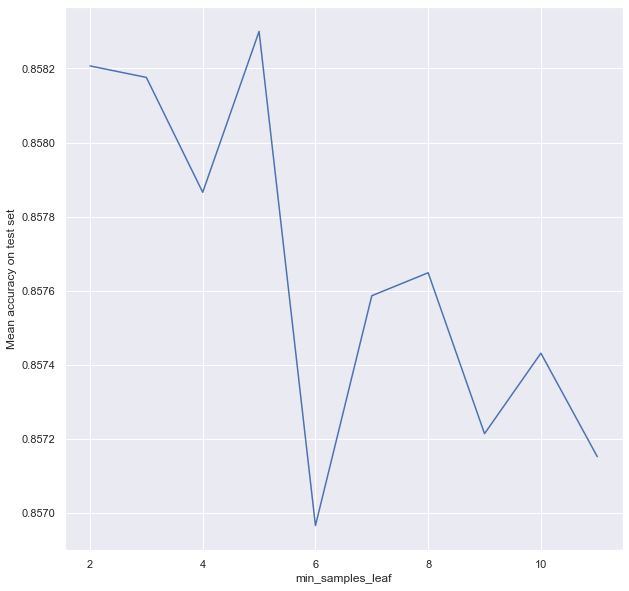

In [47]:
forest_params = {'min_samples_leaf': np.arange(2, 12), 'max_depth': [14], 'n_estimators': [110]}

forest_grid = GridSearchCV(forest, forest_params, cv=5, scoring='accuracy')
forest_grid.fit(X_train, y_train)
print('Best estimator by samples leaf:', forest_grid.best_estimator_)
print('Best score by samples leaf:', forest_grid.best_score_)

results_df = pd.DataFrame(forest_grid.cv_results_)
plt.plot(results_df['param_min_samples_leaf'], results_df['mean_test_score']) 
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean accuracy on test set')
# Also good accuracy increase is given, but estimation for bigger amount of 
# leaves just run below significantly

Best estimator by samples split: RandomForestClassifier(max_depth=14, min_samples_split=12, n_estimators=140)
Best score by samples split: 0.8589827548097133


Text(0, 0.5, 'Mean accuracy on test set')

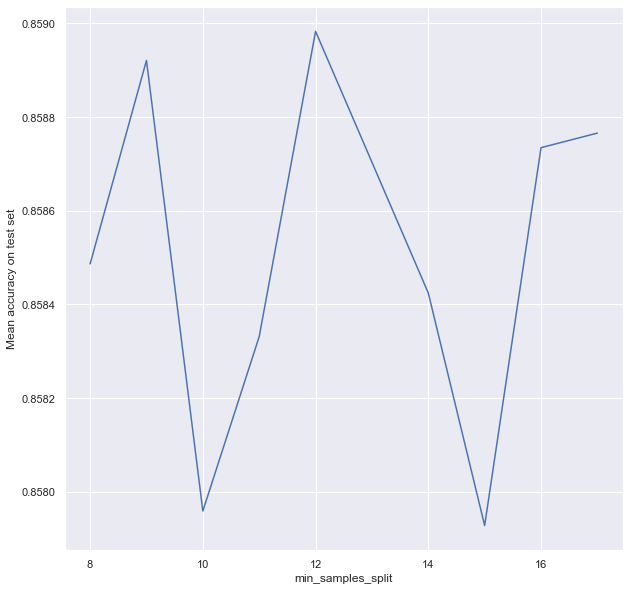

In [48]:
forest_params = {'min_samples_split': np.arange(8, 18), 'max_depth': [14], 'n_estimators': [110]}

forest_grid = GridSearchCV(forest, forest_params, cv=5, scoring='accuracy')
forest_grid.fit(X_train, y_train)
print('Best estimator by samples split:', forest_grid.best_estimator_)
print('Best score by samples split:', forest_grid.best_score_)

results_df = pd.DataFrame(forest_grid.cv_results_)
plt.plot(results_df['param_min_samples_split'], results_df['mean_test_score']) 
plt.xlabel('min_samples_split')
plt.ylabel('Mean accuracy on test set')

Best estimator by max features: RandomForestClassifier(max_depth=14, max_features=0.9, n_estimators=110)
Best score by max features: 0.8601928604690696


Text(0, 0.5, 'Mean accuracy on test set')

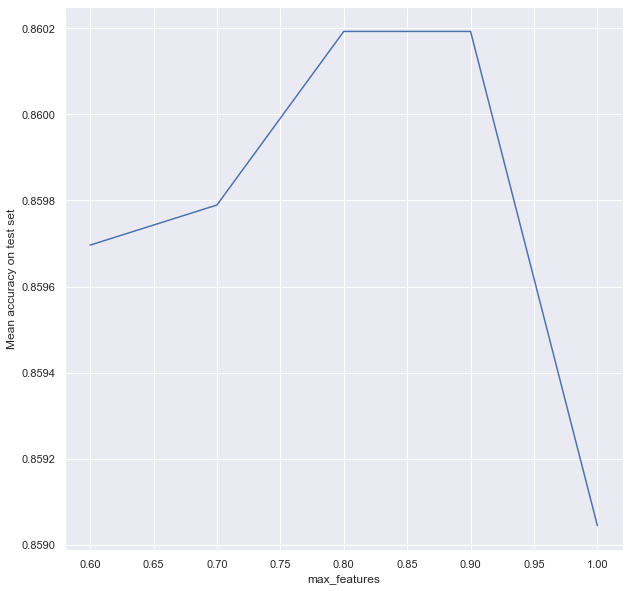

In [49]:
forest_params = {'max_features': np.array([0.6, 0.7, 0.8, 0.9, 1.0]), 'max_depth': [14], 'n_estimators': [110]}

forest_grid = GridSearchCV(forest, forest_params, cv=5, scoring='accuracy')
forest_grid.fit(X_train, y_train)
print('Best estimator by max features:', forest_grid.best_estimator_)
print('Best score by max features:', forest_grid.best_score_)

results_df = pd.DataFrame(forest_grid.cv_results_)
plt.plot(results_df['param_max_features'], results_df['mean_test_score']) 
plt.xlabel('max_features')
plt.ylabel('Mean accuracy on test set')
# Best accuracy for now (~86%) is given by max features estimation,
# where extremum is stopped on 0.7 of features number

In [50]:

from sklearn.model_selection import GridSearchCV

forest_params = {'n_estimators': [10], 'max_depth': np.arange(2, 11), 'min_samples_leaf': np.arange(2, 11),
                'min_samples_split': np.arange(2, 11), 'max_features': np.array([0.7, 0.8, 0.9])}

forest_grid = GridSearchCV(forest, forest_params, cv=5, scoring='accuracy') 
forest_grid.fit(X_train, y_train)

pd.DataFrame(forest_grid.cv_results_).T
# Estimators numbers was taken equal to 10, otherwise (>~20) run time is inappropriate (>2h)
# In this case overall accuracy is better than for dicision tree grid search 
# combinations, but lower than for random forest search by max features with 
# n_estimator == 140; perhaps if take such combinations with more trees in forest,
# the results can be even better#

0     \
mean_fit_time                                                     0.133559   
std_fit_time                                                      0.036975   
mean_score_time                                                   0.007308   
std_score_time                                                    0.002574   
param_max_depth                                                          2   
param_max_features                                                     0.7   
param_min_samples_leaf                                                   2   
param_min_samples_split                                                  2   
param_n_estimators                                                      10   
params                   {'max_depth': 2, 'max_features': 0.7, 'min_sam...   
split0_test_score                                                  0.83941   
split1_test_score                                                 0.822188   
split2_test_score                                                 0.836462   
split3_test_score                                                 0.837213   
split4_test_score                                                 0.842644   
mean_test_score                                                   0.835584   
std_test_score                                                    0.007034   
rank_test_score                                                       1977   

                                                                      1     \
mean_fit_time                                                     0.133946   
std_fit_time                                                      0.032733   
mean_score_time                                                   0.011428   
std_score_time                                                    0.003358   
param_max_depth                                                          2   
param_max_features                                                     0.7   
param_min_samples_leaf                                                   2   
param_min_samples_split                                                  3   
param_n_estimators                                                      10   
params                   {'max_depth': 2, 'max_features': 0.7, 'min_sam...   
split0_test_score                                                 0.838945   
split1_test_score                                                 0.837859   
split2_test_score                                                 0.836307   
split3_test_score                                                 0.797952   
split4_test_score                                                 0.840472   
mean_test_score                                                   0.830307   
std_test_score                                                    0.016235   
rank_test_score                                                       2068   

                                                                      2     \
mean_fit_time                                                     0.103742   
std_fit_time                                                      0.005124   
mean_score_time                                                   0.007961   
std_score_time                                                    0.003297   
param_max_depth                                                          2   
param_max_features                                                     0.7   
param_min_samples_leaf                                                   2   
param_min_samples_split                                                  4   
param_n_estimators                                                      10   
params                   {'max_depth': 2, 'max_features': 0.7, 'min_sam...   
split0_test_score                                                 0.838945   
split1_test_score                                                 0.823429   
split2_test_score                                                  0.83941   
split3_test_

In [51]:
print('Best estimator by max depth:', forest_grid.best_estimator_)
print('Best score by max depth:', forest_grid.best_score_)

Best estimator by max depth: RandomForestClassifier(max_depth=10, max_features=0.8, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=10)
Best score by max depth: 0.8579584932718669


Feature ranking:
1 is_married 0.3621851930106487
2 capital-gain 0.21555780949917933
3 educational-num 0.2089249346548752
4 capital-loss 0.07139174854802292
5 age 0.05900630268018818
6 hours-per-week 0.03385663904736655
7 occupation_Exec-managerial 0.009439334297719378
8 occupation_Other-service 0.005543660398773039
9 workclass_Self-emp-not-inc 0.005504392643579714
10 occupation_Prof-specialty 0.004733040708201217


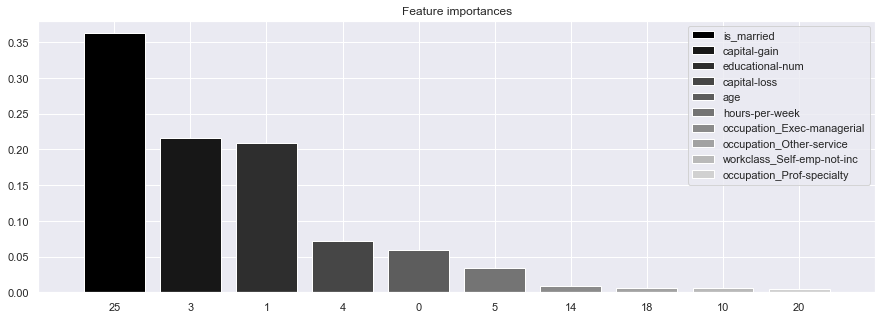

In [52]:
best_forest = forest_grid.best_estimator_

features = dict(zip(range(len(df_main.columns)-1), df_main.columns[:-1]))
importances = best_forest.feature_importances_

indices = np.argsort(importances)[::-1]
num_to_plot = 10
feature_indices = [ind for ind in indices[:num_to_plot]]

print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], 
    importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices])
# For forest features importance-level distributed a bit differently in case 
# of education num and capital gain, where last one ranked 2nd place, but 
# their importance is almost equal in general;

Comparing KNN(~83%), Decision tree(84-85%), and Random Forest(85-86%), the last one revealed the best score, also it is pretty fast, but of course not faster than simple decision tree; KNN is slower compared to trees and forest; so the optimal decision here is to select Decision tree if there is lots of data and we need to get result faster, or pick forest if accuracy is the main for our task, but difference in accuracy between forest and trees is not so great 